# Developing a Book Recommender System

#### The purpose of this project is to build a content-based book recommender system to indentify  similiar books to the refrence book and ranked them based on the similiarity. I use Charles Darwin's books and select one of them as a refrence. 

## Importing libraries and data

In [12]:
import glob, re, os

files = glob.glob('datasets/'+'*.txt') #read all .txt files

files.sort() # sorting alphabetically

display(files)

['datasets/Autobiography.txt',
 'datasets/CoralReefs.txt',
 'datasets/DescentofMan.txt',
 'datasets/DifferentFormsofFlowers.txt',
 'datasets/EffectsCrossSelfFertilization.txt',
 'datasets/ExpressionofEmotionManAnimals.txt',
 'datasets/FormationVegetableMould.txt',
 'datasets/FoundationsOriginofSpecies.txt',
 'datasets/GeologicalObservationsSouthAmerica.txt',
 'datasets/InsectivorousPlants.txt',
 'datasets/LifeandLettersVol1.txt',
 'datasets/LifeandLettersVol2.txt',
 'datasets/MonographCirripedia.txt',
 'datasets/MonographCirripediaVol2.txt',
 'datasets/MovementClimbingPlants.txt',
 'datasets/OriginofSpecies.txt',
 'datasets/PowerMovementPlants.txt',
 'datasets/VariationPlantsAnimalsDomestication.txt',
 'datasets/VolcanicIslands.txt',
 'datasets/VoyageBeagle.txt']

list

## Loading content

In [10]:
texts = []
titles = []

#decode .txt files

for f in files:
    o= open(f,encoding='utf-8-sig')
    texts.append(re.sub('[^0-9a-zA-Z]+', ' ', o.read()))
    titles.append(os.path.basename(o.name).replace('.txt', ''))
    
display([len(t) for t in texts]) #number of characters in each book


[123231,
 496068,
 1776492,
 617088,
 913712,
 624230,
 335920,
 522975,
 797401,
 901406,
 1047518,
 1010643,
 766678,
 1657659,
 298319,
 916147,
 1093309,
 1043155,
 341447,
 1149574]

list

In [17]:
display(texts[0][:20]) #first 20 carachters of the first book

' THE AUTOBIOGRAPHY O'

## Finding index of the reference

#### I wan to select 'Origin of Species' book as a reference

In [6]:
for i in range(len(titles)):
    if(titles[i]=="OriginofSpecies"):
        ori = i
        
display(ori)

15

## Tokenizing

### Transforming each book to its words

In [28]:
texts_lower_case = [t.lower() for t in texts]

texts_split = [t.split(" ") for t in texts_lower_case]

display([len(t) for t in texts_split]) #number of words in each book

display(texts_split[ori][:20]) #first 20 words of the reference book


[22838,
 88673,
 312278,
 107578,
 161675,
 110499,
 61459,
 92426,
 137999,
 161849,
 196283,
 186641,
 133664,
 290550,
 53206,
 158503,
 195764,
 186747,
 58732,
 208546]

['',
 'on',
 'the',
 'origin',
 'of',
 'species',
 'but',
 'with',
 'regard',
 'to',
 'the',
 'material',
 'world',
 'we',
 'can',
 'at',
 'least',
 'go',
 'so',
 'far']

## Filtering useless words and characters

In [38]:
from nltk.corpus import stopwords
import string

stops = stopwords.words('english') + list(string.punctuation) + list('0 1 2 3 4 5 6 7 8 9'.split())

texts_filtered = [[s for s in t if s not in stops] 
               for t in texts_split]

display([len(t) for t in texts_filtered]) #number of filtered words in each book

display(texts_filtered[ori][:20]) #first 20 filtered words of the reference book

[10894,
 46783,
 166062,
 57858,
 86268,
 57163,
 31130,
 49548,
 74557,
 83407,
 93580,
 92289,
 73155,
 160421,
 27762,
 80048,
 101630,
 103464,
 31526,
 105863]

['',
 'origin',
 'species',
 'regard',
 'material',
 'world',
 'least',
 'go',
 'far',
 'perceive',
 'events',
 'brought',
 'insulated',
 'interpositions',
 'divine',
 'power',
 'exerted',
 'particular',
 'case',
 'establishment']

## Stemming

### Transforming each words to its stem

In [39]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stems =[[stemmer.stem(w) for w in t] for t in texts_filtered]

display(stems[ori][:20])

['',
 'origin',
 'speci',
 'regard',
 'materi',
 'world',
 'least',
 'go',
 'far',
 'perceiv',
 'event',
 'brought',
 'insul',
 'interposit',
 'divin',
 'power',
 'exert',
 'particular',
 'case',
 'establish']

## Building bag-of-words

In [60]:
from gensim.corpora import Dictionary

## Create a dictionary from the stems
dic = Dictionary(stems)

bows = [dic.doc2bow(s) for s in stems] #list of all uniques stems in a book associated with their respective number of occurrences.

print(len(dictionary)) #all unique stems in Charls Darwin's books

print(bows[ori][:5]) #the first five elements of the reference book BoW model (stem id,occurence)

20
28074
[(0, 2), (5, 51), (6, 1), (8, 2), (21, 1)]


## Data frame representation

In [84]:
import pandas as pd

bow_ori_df = pd.DataFrame(bows[ori])

display(bow_ori_df)

,0,1
0,0,2
1,5,51
2,6,1
3,8,2
4,21,1
...,...,...
4979,24396,2
4980,24397,1
4981,24398,1
4982,24399,1


There are 4984 unique stems in Origin of Species book. Column '0' shows each stem id in the dictionary, and column '1' indicates that stem's number of occurence in the book.

## The most common stems of the given book

In [85]:
bow_ori_df["stem"] = [dictionary[index] for index in bow_ori_df[0]]

bow_ori_df = bow_ori_df.sort_values(by=[1], ascending=False)

bow_ori_df.columns = ['id','occurrences','stem']

bow_ori_df[:10]


,id,occurrences,stem
1420,2219,1543,speci
1015,1606,677,natur
406,677,666,differ
1063,1680,657,one
614,983,618,form
1630,2526,516,varieti
954,1503,510,may
233,399,509,case
1695,2631,496,would
650,1042,464,gener


## term frequency–inverse document frequency

The most recurring stems are, apart from few exceptions, very common and unlikely to carry any information peculiar to the given book. So, tf-idf model (term frequency–inverse document frequency) is applied. It defines the importance of each word depending on how frequent it is in this book and how infrequent it is in all the other documents. As a result, a high tf-idf score for a word indicates that this word is specific to this text.


In [87]:
from gensim.models import TfidfModel

model = TfidfModel(bows)

df_tfidf = pd.DataFrame(model[bows[ori]])

df_tfidf.columns=["id", "score"]

df_tfidf['stem'] = [dictionary[i] for i in list(df_tfidf["id"])]

df_tfidf.sort_values(by="score", ascending=False).head(10)

,id,score,stem
873,2098,0.326690,select
3093,10010,0.203457,pigeon
129,349,0.197284,breed
2975,9297,0.167125,migrat
939,2256,0.147859,steril
285,725,0.145667,domest
501,1212,0.127989,hybrid
371,936,0.127252,fertil
3877,16114,0.124117,rtner
3527,12617,0.120929,naturalis


10 most specific stems in the "On the Origin of Species" book (the 10 stems with the highest tf-idf score).

## Computing pairwise distance among books

Compute cosine similarity against books

In [88]:
from gensim import similarities

sims = similarities.MatrixSimilarity(model[bows])

sim_df = pd.DataFrame(list(sims))

sim_df.columns = titles

sim_df.index = titles

sim_df

,Autobiography,CoralReefs,DescentofMan,DifferentFormsofFlowers,EffectsCrossSelfFertilization,ExpressionofEmotionManAnimals,FormationVegetableMould,FoundationsOriginofSpecies,GeologicalObservationsSouthAmerica,InsectivorousPlants,LifeandLettersVol1,LifeandLettersVol2,MonographCirripedia,MonographCirripediaVol2,MovementClimbingPlants,OriginofSpecies,PowerMovementPlants,VariationPlantsAnimalsDomestication,VolcanicIslands,VoyageBeagle
Autobiography,1.000000,0.049424,0.080241,0.066563,0.077386,0.088270,0.040762,0.059164,0.030476,0.014911,0.535421,0.292003,0.005694,0.008105,0.022908,0.099969,0.016259,0.048890,0.038395,0.181772
CoralReefs,0.049424,1.000000,0.009469,0.001891,0.001877,0.004980,0.029383,0.022120,0.061006,0.002251,0.044164,0.026415,0.006319,0.010547,0.001493,0.039084,0.002670,0.011564,0.057497,0.267888
DescentofMan,0.080241,0.009469,1.000000,0.072669,0.029937,0.147847,0.027027,0.135672,0.009663,0.009340,0.086610,0.130060,0.053506,0.043243,0.005093,0.266783,0.011258,0.232807,0.007851,0.123537
DifferentFormsofFlowers,0.066563,0.001891,0.072669,1.000000,0.392026,0.006397,0.009650,0.039996,0.002753,0.007377,0.023943,0.077125,0.009367,0.005409,0.007794,0.128643,0.018729,0.049545,0.002559,0.013030
EffectsCrossSelfFertilization,0.077386,0.001877,0.029937,0.392026,1.000000,0.006797,0.031852,0.040239,0.002177,0.006678,0.029352,0.077068,0.003157,0.002803,0.014791,0.146217,0.039486,0.054929,0.002136,0.017056
ExpressionofEmotionManAnimals,0.088270,0.004980,0.147847,0.006397,0.006797,1.000000,0.020923,0.047055,0.005191,0.011455,0.092981,0.077286,0.016824,0.029880,0.005881,0.062146,0.011270,0.083697,0.005535,0.098134
FormationVegetableMould,0.040762,0.029383,0.027027,0.009650,0.031852,0.020923,1.000000,0.021420,0.067915,0.035477,0.042031,0.039082,0.019832,0.023891,0.038586,0.049408,0.040001,0.033259,0.059399,0.097929
FoundationsOriginofSpecies,0.059164,0.022120,0.135672,0.039996,0.040239,0.047055,0.021420,1.000000,0.027987,0.006003,0.082401,0.085875,0.007629,0.010819,0.003967,0.324344,0.008745,0.194424,0.017541,0.089229
GeologicalObservationsSouthAmerica,0.030476,0.061006,0.009663,0.002753,0.002177,0.005191,0.067915,0.027987,1.000000,0.006783,0.040634,0.017513,0.009675,0.024688,0.001953,0.057885,0.003330,0.014316,0.373227,0.260243
InsectivorousPlants,0.014911,0.002251,0.009340,0.007377,0.006678,0.011455,0.035477,0.006003,0.006783,1.000000,0.008947,0.027304,0.019193,0.019966,0.249718,0.014858,0.022809,0.010415,0.008485,0.014731


## Visulaizing the matrix

Books ranking based on their similiarity to "On the Origin of Species".

Text(0.5, 1.0, "Most similar books to 'On the Origin of Species'")

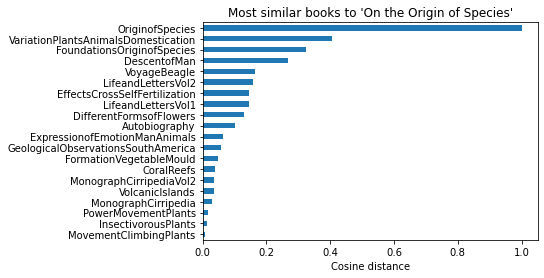

In [89]:
import matplotlib.pyplot as plt

v = sim_df["OriginofSpecies"]

v_sorted = v.sort_values(ascending=True)

v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

plt.xlabel("Cosine distance")
plt.ylabel("")
plt.title("Most similar books to 'On the Origin of Species'")

## Visualizing how Darwin's books are generally related to each other

By representing the whole similarity matrix as a dendrogram, we can find a book's closest relative, also, we can visualize which groups of books have similar topics.

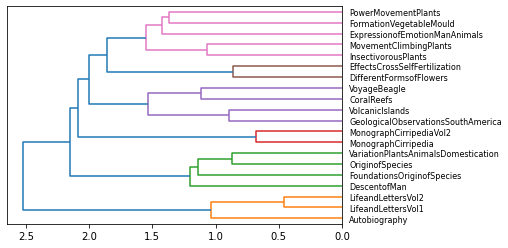

In [94]:
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, 'ward')

# Display this result as a horizontal dendrogram
a = hierarchy.dendrogram(Z,  leaf_font_size=8, labels=titles,  orientation="left")